<a href="https://colab.research.google.com/github/anwishn/ESAA/blob/main/1010_AppleStock_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [53]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [54]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [55]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 4.  Check out the type of the columns

In [56]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [57]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',',parse_dates=[0])
print(apple.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB
None


### Step 6.  Set the date as the index

In [58]:
apple.index = apple['Date']
print(apple.index)

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)


### Step 7.  Is there any duplicate dates?

In [59]:
apple.index[apple.duplicated('Date')]

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [60]:
apple['Date'].is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [61]:
apple.index = apple.index.sort_values()
print(apple.index)

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03',
               '2014-07-07', '2014-07-08'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)


In [62]:
apple.sort_index
print(apple.index)

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03',
               '2014-07-07', '2014-07-08'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)


### Step 9. Get the last business day of each month

In [63]:
# 이렇게 하면 이 기간 안에 마지막 비즈니스 날짜만 추출돼 # 오류?
print(pd.date_range('1980-12-12','2014-07-08', freq='BM'))
print(pd.date_range(start=apple.index.min(), end=apple.index.max(), freq='BM'))

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')
DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')


In [64]:
apple['year'] = apple.Date.dt.year
apple['month'] = apple.Date.dt.month
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close,year,month
Date,,,,,,,,,
1980-12-12,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014,7
1980-12-15,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014,7
1980-12-16,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014,7
1980-12-17,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014,7
1980-12-18,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014,7


In [74]:
last_month = apple.drop_duplicates(subset =['year','month'], keep='first')
last_month

,Date,Open,High,Low,Close,Volume,Adj Close,year,month,ref_date
ref_date,,,,,,,,,,
12261 days,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014,7,12261 days
12253 days,2014-06-30,92.10,93.73,92.09,92.93,49482300,92.93,2014,6,12253 days
12222 days,2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43,2014,5,12222 days
12192 days,2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83,2014,4,12192 days
12162 days,2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25,2014,3,12162 days
...,...,...,...,...,...,...,...,...,...,...
139 days,1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44,1981,4,139 days
109 days,1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38,1981,3,109 days
77 days,1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41,1981,2,77 days


### Step 10.  What is the difference in days between the first day and the oldest

In [66]:
diff1 = apple.index[0]-apple.index[-1]
print(diff1)

diff2 = apple.index[-1]-apple.index[0]
print(diff2)

-12261 days +00:00:00
12261 days 00:00:00


### Step 11.  How many months in the data we have?

In [67]:
len(head_range)

403

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

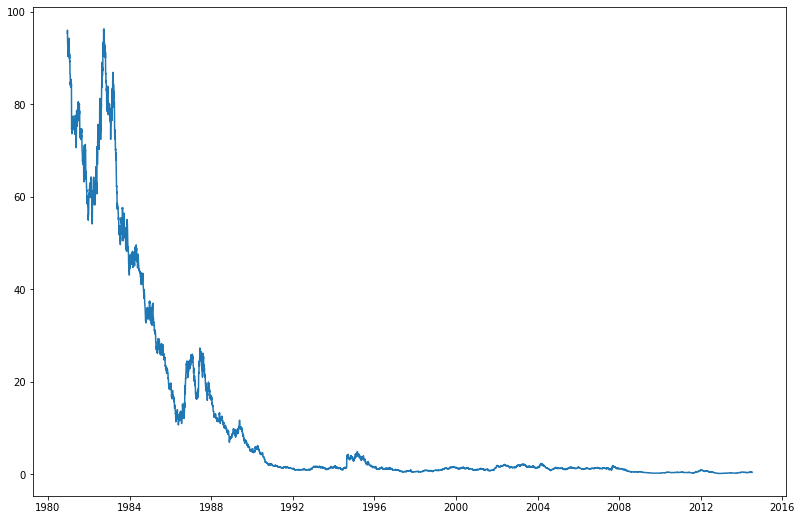

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13.5,9))
axes1 = fig.add_subplot(1,1,1)
axes1.plot(apple['Adj Close'])

### BONUS: Create your own question and answer it.

Q. 시간 간격을 인덱스로 지정하여 최초 5일의 데이터를 추출하시오.

In [69]:
apple['ref_date'] = apple['Date'] - apple['Date'].min()
apple.index = apple['ref_date']
print(apple['5 days':].iloc[:5,:5])

               Date   Open   High    Low  Close
ref_date                                       
5 days   1980-12-17  25.87  26.00  25.87  25.87
4 days   1980-12-16  25.37  25.37  25.25  25.25
3 days   1980-12-15  27.38  27.38  27.25  27.25
0 days   1980-12-12  28.75  28.87  28.75  28.75
